In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm

## 0) Data Load

In [5]:
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'],dtype={'parcelid':int})

In [6]:
prop_16 = pd.read_csv('properties_2016.csv',dtype={'fireplaceflag':object, 'taxdelinquencyflag':object, 'fireplaceflag':object, 'propertyzoningdesc':object, 'propertycountylandusecode':object, 'hashottuborspa':object})

In [7]:
train_df1 = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [8]:
train_df = train_df1.copy()

17년 데이터는 생략한 상태

# 1) Analysis Region-Feature

- Title :` <real estate feature>`
- 'propertycountylandusecode'
- 'propertylandusetypeid'
- 'propertyzoningdesc'
- 'rawcensustractandblock'
- 'censustractandblock'
-  Title : `< Location feature>`
- 'latitude'
- 'longitude'
- Title : `<address feature>`
- 'fips'
- 'regionidcounty'
- 'regionidcity'
- 'regionidzip'
- 'regionidneighborhood'
- `initially, I divided three features named region, location,adress but, I'd like to try three things into one characteristic in this EDA.`

region feature는 총 12 개의 컬럼으로 이뤄져있고, 분류 기준은 지역, 주소, 부동산에 관련된 것으로 통합적으로 지역에 관련된 컬럼입니다.

In [9]:
region_feature = [
    'county land use code : 지역이 어떻게 개발되고 사용될 지에 대한 regulation',
     '토지가 어떻게 사용되는지에 대한 타입',
     '해당 부동산에 대해 허용 된 토지 용도 (구역 설정)에 대한 설명',
    'Raw Census tract와 블록 ID 결합 - 또한 확장에 의한 블록 그룹 할당 포함',
     'Census tract와 블록 ID 결합 - 또한 확장에 의한 블록 그룹 할당 포함',
     '소포 중도 위도에 10e6을 곱한 값',
     '소포 중도 경도에 10e6을 곱한 값',
    '연방 정보 처리 규정(연방에서 해당 지역을 어떻게 정보 처리하는지에 대한 것)',
     '해당 부동산이 위치하는 카운티(county:Second-level administrative division)',
     '해당 부동산이있는 도시 (있는 경우)',
    '해당 부동산이 위치한 우편 번호',
    '해당 부동산이 위치한 동네'

]

In [10]:
region_feature_col = [
    'propertycountylandusecode',
    'propertylandusetypeid',
    'propertyzoningdesc',
    'rawcensustractandblock',
    'censustractandblock',
    'latitude',
    'longitude',
    'fips',
    'regionidcounty',
    'regionidcity',
    'regionidzip',
    'regionidneighborhood'
    

]

In [11]:
region_df = pd.DataFrame(columns=['name','feature'])
region_df.name = region_feature_col
region_df.feature = region_feature
region_df

,name,feature
0,propertycountylandusecode,county land use code : 지역이 어떻게 개발되고 사용될 지에 대한 ...
1,propertylandusetypeid,토지가 어떻게 사용되는지에 대한 타입
2,propertyzoningdesc,해당 부동산에 대해 허용 된 토지 용도 (구역 설정)에 대한 설명
3,rawcensustractandblock,Raw Census tract와 블록 ID 결합 - 또한 확장에 의한 블록 그룹 할...
4,censustractandblock,Census tract와 블록 ID 결합 - 또한 확장에 의한 블록 그룹 할당 포함
5,latitude,소포 중도 위도에 10e6을 곱한 값
6,longitude,소포 중도 경도에 10e6을 곱한 값
7,fips,연방 정보 처리 규정(연방에서 해당 지역을 어떻게 정보 처리하는지에 대한 것)
8,regionidcounty,해당 부동산이 위치하는 카운티(county:Second-level administr...
9,regionidcity,해당 부동산이있는 도시 (있는 경우)


- region_feature에는 12개의 컬럼이 있고, 두 개의 object 자료형과 10개의 float형이 있다.
- numerical data, object data 를 가지고 있는 컬럼들을 나눠서 분석을 하도록 하겠다.

In [12]:
print(train_df[region_feature_col].dtypes,end='\n\n'),
print('Number of tax_feature_col:  {}'.format(len(region_feature_col)))

propertycountylandusecode     object
propertylandusetypeid        float64
propertyzoningdesc            object
rawcensustractandblock       float64
censustractandblock          float64
latitude                     float64
longitude                    float64
fips                         float64
regionidcounty               float64
regionidcity                 float64
regionidzip                  float64
regionidneighborhood         float64
dtype: object

Number of tax_feature_col:  12


In [13]:
region_numeric = []
region_object = []
for col in region_feature_col:
    if train_df[col].dtypes == 'float64':
        region_numeric.append(col)
    else:region_object.append(col)

In [14]:
region_numeric
print(len(region_numeric))

10


In [15]:
region_object
print(len(region_object))

2


## 1.3) Individual columns' feature analysis

### scatter plot about numerical data

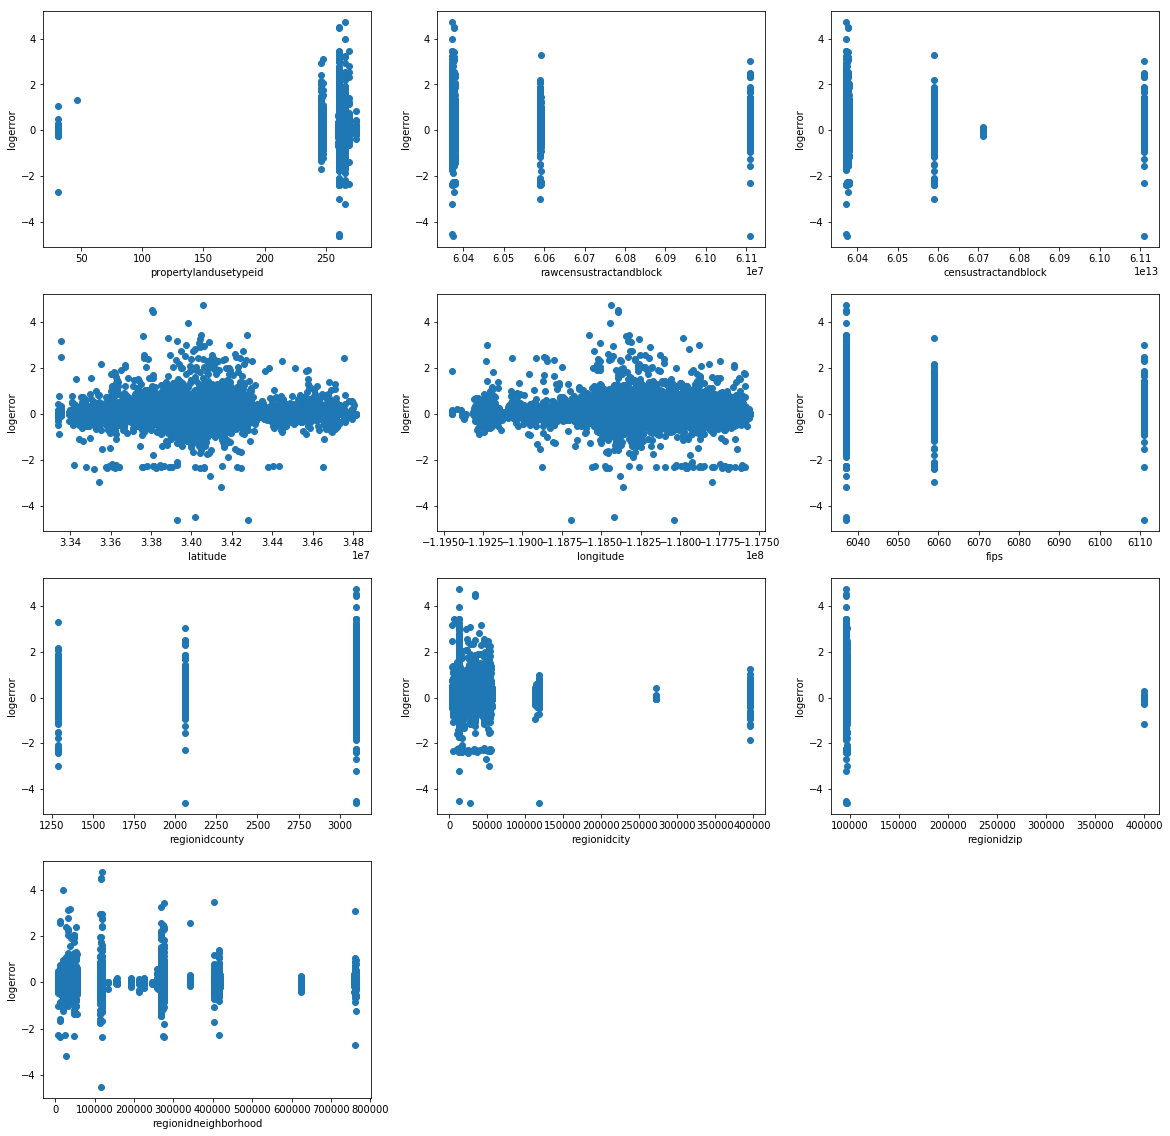

In [25]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(region_numeric):
    plt.subplot(4,3,idx+1)
    plt.scatter(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

- float 자료형에 대한 scatterplot을 그려본 결과 분포의 형태가 continuous하지 않고, discrete한 분포를 띄고 있다.
- 즉, numeric category를 가지고 있을 수 있는 컬럼이라고 생각하고, 카테고리의 갯수를 20개 미만으로 가지는 데이터에 대해서 다시 분포에 대해 시각화해본다.

In [16]:
discrete_region_col = []
for idx,col in enumerate(region_feature_col):
    if len(train_df[col].value_counts())<40:
        print(train_df[col].value_counts())
        discrete_region_col.append(col)
len(discrete_region_col)

261.0    60637
266.0    22815
246.0     2376
269.0     2334
248.0      879
247.0      629
265.0      356
263.0       84
260.0       62
275.0       46
267.0       28
31.0        17
264.0       11
47.0         1
Name: propertylandusetypeid, dtype: int64
6037.0    58574
6059.0    24505
6111.0     7196
Name: fips, dtype: int64
3101.0    58574
1286.0    24505
2061.0     7196
Name: regionidcounty, dtype: int64


3

40 개 미만의 카테고리를 가지는 discrete data column 이 총 3개가 나왔다. 이 컬럼들에 대해서 stripplot,viloinplot을 적용해 시각화한다.

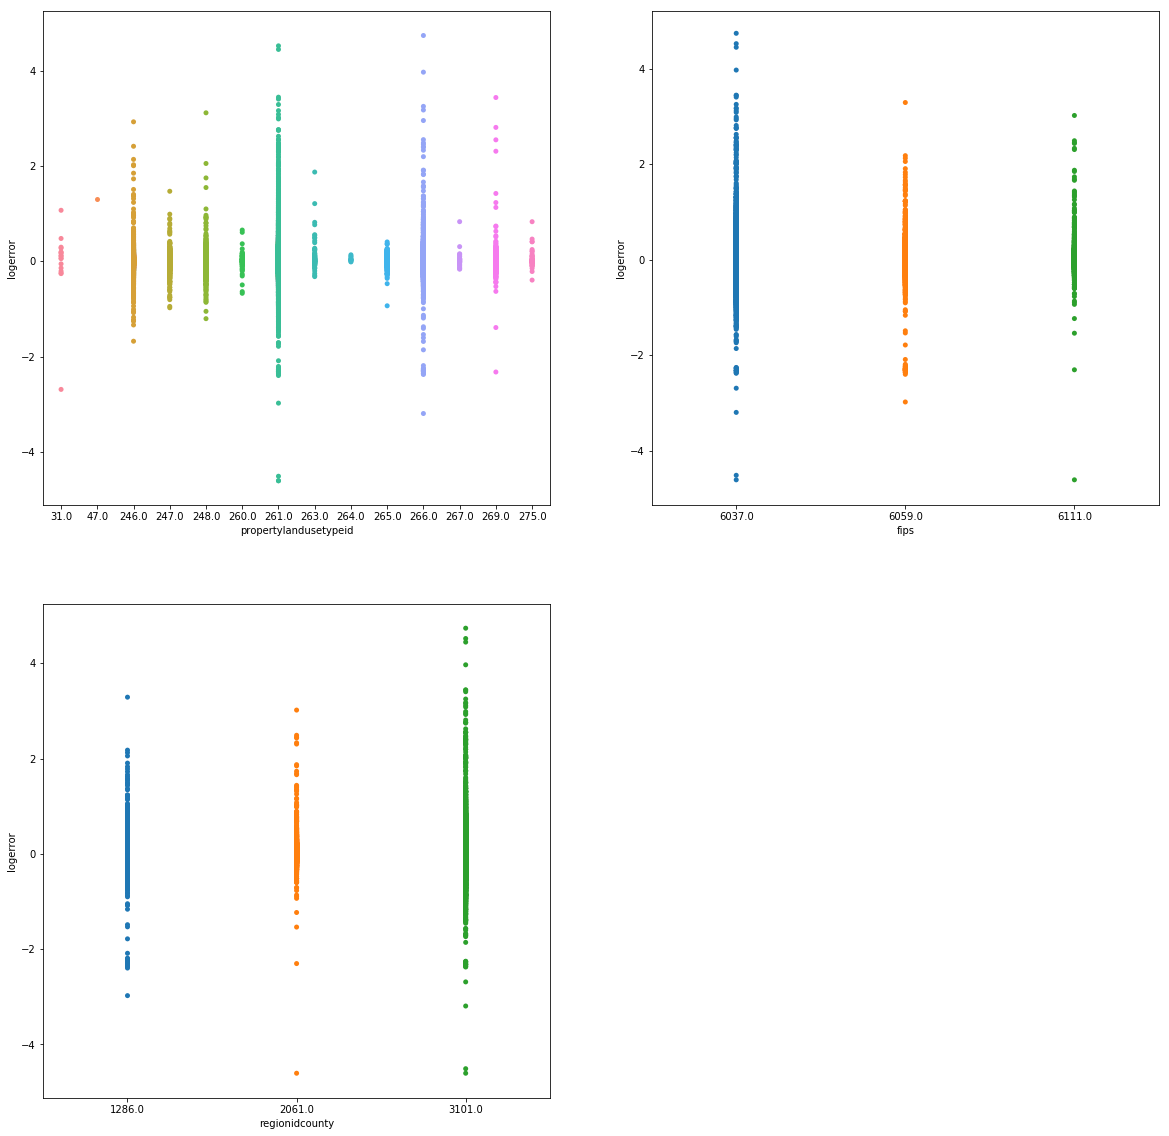

In [27]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(discrete_region_col):
    plt.subplot(2,2,idx+1)
    sns.stripplot(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

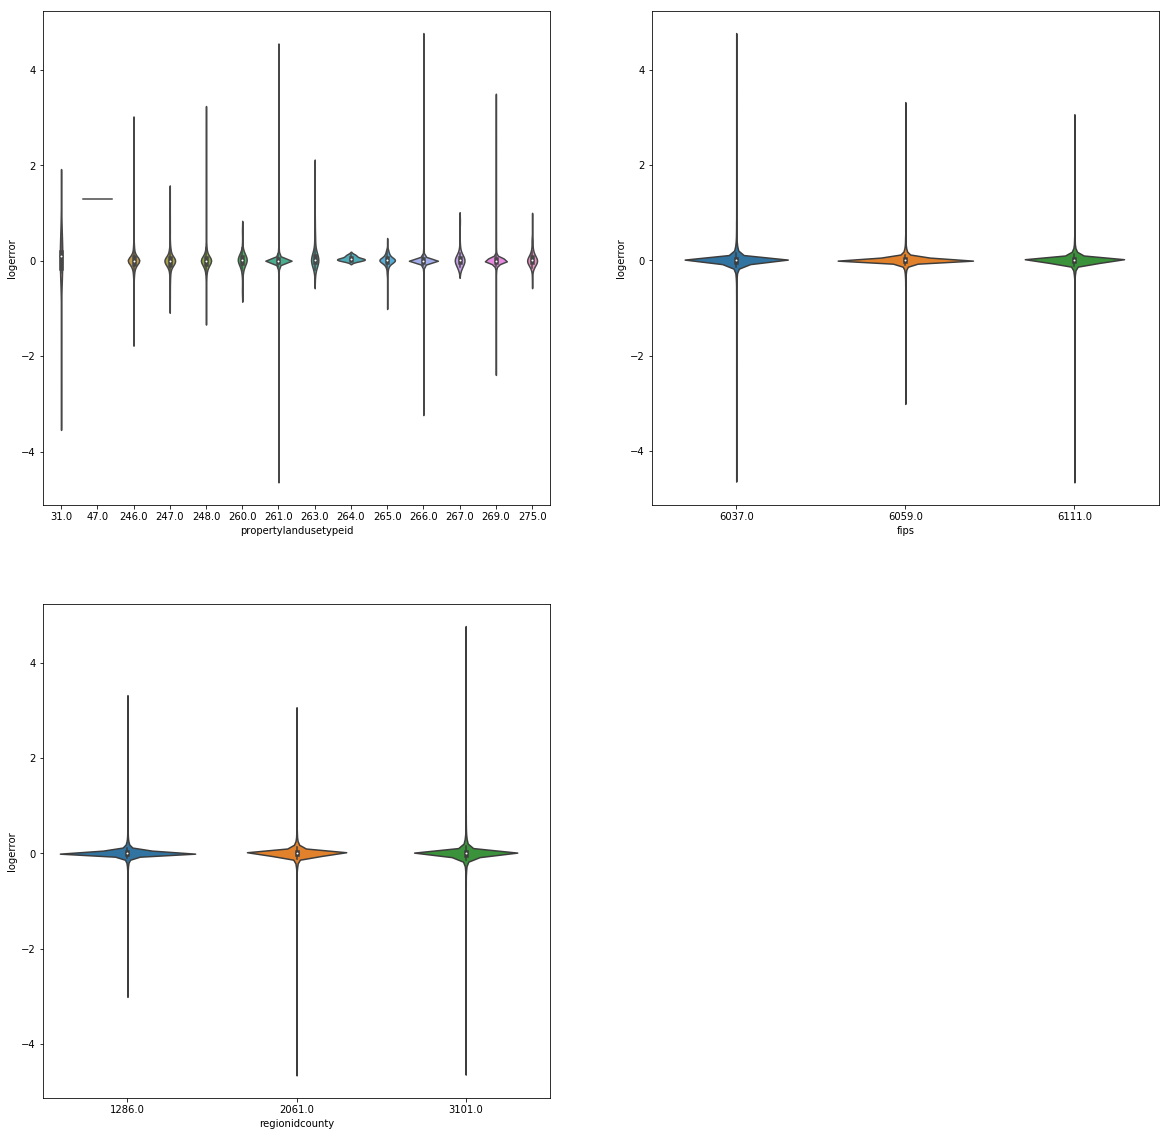

In [28]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(discrete_region_col):
    plt.subplot(2,2,idx+1)
    sns.violinplot(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

- category를 나누는 기준이 40개를 지정했지만, discrete data의 카테고리는 많지 않고 분포도 고른 것으로 파악된다.

# 2) Analysis Missing value 

우선 outer-feature 내의 컬럼들로 구성된 데이터 프레임 'outer_df'를 생성해보겠습니다.

In [17]:
region_df = train_df[region_feature_col]
region_df.tail()

,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,censustractandblock,latitude,longitude,fips,regionidcounty,regionidcity,regionidzip,regionidneighborhood
90270,010C,266.0,LARD1.5,6.037132e+07,6.037132e+13,34203000.0,-118562000.0,6037.0,3101.0,12447.0,96364.0,40548.0
90271,0100,261.0,GLR1RY,6.037301e+07,6.037301e+13,34198744.0,-118224849.0,6037.0,3101.0,45457.0,96327.0,274580.0
90272,0200,246.0,EMR3YY,6.037433e+07,6.037433e+13,34075655.0,-118025537.0,6037.0,3101.0,51861.0,96478.0,NaN
90273,010C,266.0,INR4*,6.037601e+07,6.037601e+13,33963900.0,-118367000.0,6037.0,3101.0,45888.0,96133.0,NaN
90274,0100,261.0,CARS*,6.037544e+07,6.037544e+13,33838933.0,-118219093.0,6037.0,3101.0,NaN,96244.0,NaN


In [18]:
missing_region_df = region_df.isnull().sum().reset_index()
missing_region_df.columns = ['col','missing_cnt']
missing_region_df['missing_ratio'] = missing_region_df.missing_cnt / len(region_df)
missing_region_df.sort_values(by='missing_ratio',inplace=True)
missing_region_df.reset_index(drop=True,inplace=True)
missing_region_df

,col,missing_cnt,missing_ratio
0,propertylandusetypeid,0,0.000000
1,rawcensustractandblock,0,0.000000
2,latitude,0,0.000000
3,longitude,0,0.000000
4,fips,0,0.000000
5,regionidcounty,0,0.000000
6,propertycountylandusecode,1,0.000011
7,regionidzip,35,0.000388
8,censustractandblock,605,0.006702
9,regionidcity,1803,0.019972


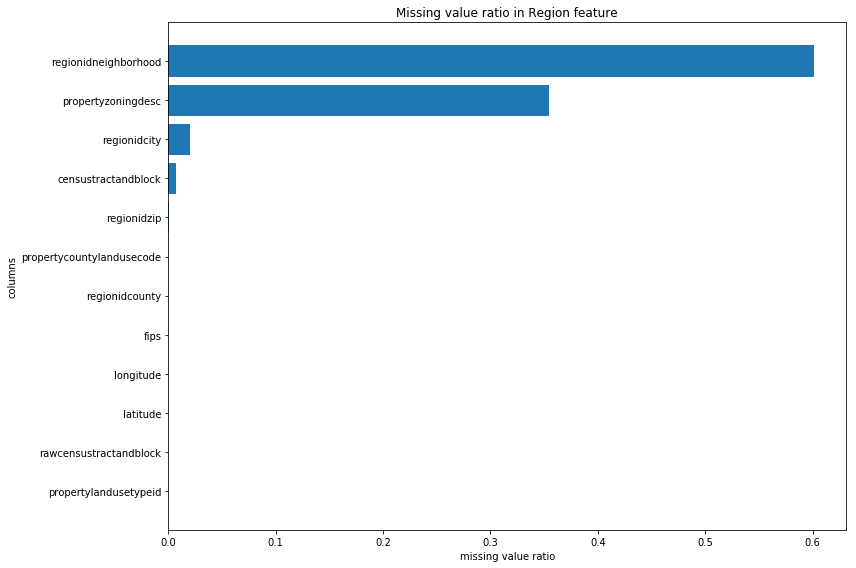

In [19]:
plt.figure(figsize=(12,8))
plt.barh(missing_region_df.col,missing_region_df.missing_ratio)
plt.title('Missing value ratio in Region feature')
plt.xlabel('missing value ratio')
plt.ylabel('columns')
plt.tight_layout()
plt.show()

## 2.1) Fill the Missing data

In [20]:
missing_region_df

,col,missing_cnt,missing_ratio
0,propertylandusetypeid,0,0.000000
1,rawcensustractandblock,0,0.000000
2,latitude,0,0.000000
3,longitude,0,0.000000
4,fips,0,0.000000
5,regionidcounty,0,0.000000
6,propertycountylandusecode,1,0.000011
7,regionidzip,35,0.000388
8,censustractandblock,605,0.006702
9,regionidcity,1803,0.019972


- 위의 missing_ratio를 보면 5개의 컬럼이 NaN값의 비율이 99%가 넘는다. 이는 두 가지 이유로 나눠질 수 있다.
    - 0을 의미 -> 0으로 filling
    - 기록이 누락되었음, 그냥 없는 데이터를 의미 -> deleting columns
- missing_data에 대해서 delete가 아닌 filling을 선택할 때의 경우의 수
    - mean imputation : continous data
    - mode imputation : discrete data , categorical data
    - 'None' or '0' imputation : missing_data means zero in quantitative or qualitative prospect. 

In [22]:
region_df.tail()

,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,censustractandblock,latitude,longitude,fips,regionidcounty,regionidcity,regionidzip,regionidneighborhood
90270,010C,266.0,LARD1.5,6.037132e+07,6.037132e+13,34203000.0,-118562000.0,6037.0,3101.0,12447.0,96364.0,40548.0
90271,0100,261.0,GLR1RY,6.037301e+07,6.037301e+13,34198744.0,-118224849.0,6037.0,3101.0,45457.0,96327.0,274580.0
90272,0200,246.0,EMR3YY,6.037433e+07,6.037433e+13,34075655.0,-118025537.0,6037.0,3101.0,51861.0,96478.0,NaN
90273,010C,266.0,INR4*,6.037601e+07,6.037601e+13,33963900.0,-118367000.0,6037.0,3101.0,45888.0,96133.0,NaN
90274,0100,261.0,CARS*,6.037544e+07,6.037544e+13,33838933.0,-118219093.0,6037.0,3101.0,NaN,96244.0,NaN


#### propertycountylandusecode : 0.0%
- Description: 'county land use code : 지역이 어떻게 개발되고 사용되는지에 규제하는 것에 대한 정보가 있는 코드'
- Process: object datatype으로 code 종류는 77개가 있다. missing_value가 1개가 있으므로 mode값으로 채워넣어준다.

In [70]:
train_df.propertycountylandusecode = train_df.propertycountylandusecode.fillna(train_df.propertycountylandusecode.mode()[0])

In [60]:
train_df.propertycountylandusecode.isnull().sum()

1

In [61]:
train_df.propertycountylandusecode.describe()

count     90274
unique       77
top        0100
freq      30846
Name: propertycountylandusecode, dtype: object

In [64]:
train_df.propertycountylandusecode.value_counts().sort_values().tail()

34       5946
0101     7435
010C    10264
122     15383
0100    30846
Name: propertycountylandusecode, dtype: int64

In [66]:
len(train_df.propertycountylandusecode.value_counts().sort_values())

77

#### propertylandusetypeid : 0.0%
- Description: '토지가 어떻게 사용되는지에 대한 타입'
- Process: missing_value가 없다. 통계치를 살펴보게 되면, 'single family residential' 즉, 단독주택의 비율이 가장 높다. 그 다음으로는 분양 아파트가 높다.

In [80]:
train_df.propertylandusetypeid.isnull().sum()

0

In [79]:
train_df.propertylandusetypeid.describe()

count    90275.000000
mean       261.832179
std          5.182901
min         31.000000
25%        261.000000
50%        261.000000
75%        266.000000
max        275.000000
Name: propertylandusetypeid, dtype: float64

In [78]:
train_df.propertylandusetypeid.value_counts().sort_values().tail()

248.0      879
269.0     2334
246.0     2376
266.0    22815
261.0    60637
Name: propertylandusetypeid, dtype: int64

- 이 다음으로 다룰 두 개의 컬럼은 각각 'rawcensustractandblock' 과 'censustractandblock' 이다. 
- 주석의 내용이 같아 `비교`가 필요하다.
- 지역의 위치 특성에 따라서 census tract를 나누고, 이에 따라서 block code를 지정한다.

#### censustractandblock : 0.67%
- Description: ' Census tract와 블록 ID 결합 - 또한 확장에 의한 블록 그룹 할당 포함
#### rawcensustractandblock : 0.00%
- Description: 'Census tract와 블록 ID 결합 - 또한 확장에 의한 블록 그룹 할당 포함
#### process 
- 해당 두 컬럼은 코드를 나타내는 것이기 때문에 string타입으로 변환하여 비교한다. 두 컬럼의 str타입을 비교해 보면 rawcensustract에서 '.' 을 없애주면 censustract와 같아지는 것을 알 수 있다. 따라서 코드의 표현 방식은 다르지만, 의미하는 지역특성과 속성은 같다고 판단된다.다만 value_count를 해보면 기제된 코드의 종류가 rawcensustract code가 약 250개 정도 많다. 따라서 missing_value가 없는 rawcensus를 채택하고, censustractandblock column은 `delete`

In [97]:
print('census null cnt: {}'.format(train_df.censustractandblock.isnull().sum())),
print('rawcensus null cnt: {}'.format(train_df.rawcensustractandblock.isnull().sum()))

census null cnt: 605
rawcensus null cnt: 0


In [65]:
train_df.censustractandblock.astype('str').tail()

90270    60371317011005.0
90271    60373008002017.0
90272    60374327001008.0
90273    60376014013000.0
90274    60375440011011.0
Name: censustractandblock, dtype: object

In [66]:
train_df.rawcensustractandblock.astype('str').tail()

90270    60371317.01100501
90271    60373008.00201701
90272      60374327.001008
90273         60376014.013
90274      60375440.011011
Name: rawcensustractandblock, dtype: object

In [108]:
print(len(train_df.censustractandblock.value_counts()),end='\n'),
print(len(train_df.rawcensustractandblock.value_counts()))

42398
42647


- 위도를 나타내는 latitude와 경도를 나타내는 longtitude 컬럼 또한 pair하게 묶어서 분석한다.
- 두 컬럼 모두 10e6을 곱해주어 scaling process도 이미 되어 있다.

#### longtitude : 0.00%
- Description : 소포 중도 경도에 10e6을 곱한  
#### latitude : 0.00%
- Description : 소포 중도 위도에 10e6을 곱한 값
#### Process :  
- missing_value가 없으므로, 별다른 process는 필요하지 않다. 

In [50]:
print('longtitude null cnt: {}'.format(train_df.longitude.isnull().sum())),
print('latitude null cnt: {}'.format(train_df.latitude.isnull().sum()))

census null cnt: 0
rawcensus null cnt: 0


In [51]:
print((train_df.longitude.describe()),end='\n\n\n'),
print((train_df.latitude.describe()))

count    9.027500e+04
mean    -1.181989e+08
std      3.606032e+05
min     -1.194479e+08
25%     -1.184117e+08
50%     -1.181734e+08
75%     -1.179216e+08
max     -1.175549e+08
Name: longitude, dtype: float64


count    9.027500e+04
mean     3.400541e+07
std      2.649654e+05
min      3.333930e+07
25%      3.381154e+07
50%      3.402150e+07
75%      3.417274e+07
max      3.481601e+07
Name: latitude, dtype: float64


In [52]:
print(train_df.longitude.value_counts().sort_values().tail(),end='\n\n\n'),
print(train_df.latitude.value_counts().sort_values().tail())

-118466000.0    63
-118390000.0    70
-118383000.0    71
-118389000.0    76
-118445000.0    82
Name: longitude, dtype: int64


33667397.0    31
33785200.0    34
33578836.0    34
33665651.0    41
33984600.0    67
Name: latitude, dtype: int64


In [53]:
print(len(train_df.longitude.value_counts()),end='\n'),
print(len(train_df.latitude.value_counts()))

71900
73312


In [ ]:
sns.countplot(longitude,data=train_df)
sns.countplot(latitude,data=train_df)
plt.show()

#### regionidcounty	 : 0.00%
- Description : 해당 부동산이 위치하는 카운티(county:Second-level administrative division)
- Process : missing_value가 없기 때문에 처리해야 할 프로세스는 없지만, 통계치를 보게 되면, 3 가지 값으로 나뉘게 된다. fips에서 처리하는 지역의 county fips code이다. 이를 통해 zillow 에서 조사한 지역이 세 곳이며, 세 지역에 대해서 골고루 조사가 된 것은 아닌 것을 알 수 있다. 또한, 지역이 나뉘므로 이에 따른 logerror와의 상관성을 분석해볼 수 있다.

In [23]:
train_df.regionidcounty.describe()

count    90275.000000
mean      2525.420770
std        805.694842
min       1286.000000
25%       1286.000000
50%       3101.000000
75%       3101.000000
max       3101.000000
Name: regionidcounty, dtype: float64

In [24]:
train_df.regionidcounty.value_counts().sort_values().tail()

2061.0     7196
1286.0    24505
3101.0    58574
Name: regionidcounty, dtype: int64

In [25]:
len(train_df.regionidcounty.value_counts())

3

#### fips : 0.00%
- Description : 연방 정보 처리 규정(연방에서 해당 지역을 어떻게 정보 처리하는지에 대한 것)
- Process : missing_value가 없기 때문에 처리해야 할 프로세스는 없지만, 통계치를 보게 되면, 3 가지 값으로 나뉘게 된다. fips에서 처리하는 지역의 county fips code이다. 이를 통해 zillow 에서 조사한 지역이 세 곳이며, 세 지역에 대해서 골고루 조사가 된 것은 아닌 것을 알 수 있다. 또한, 지역이 나뉘므로 이에 따른 logerror와의 상관성을 분석해볼 수 있다.

In [26]:
train_df.fips.describe()

count    90275.000000
mean      6048.870551
std         20.663461
min       6037.000000
25%       6037.000000
50%       6037.000000
75%       6059.000000
max       6111.000000
Name: fips, dtype: float64

In [27]:
train_df.fips.value_counts().sort_values().tail()

6111.0     7196
6059.0    24505
6037.0    58574
Name: fips, dtype: int64

In [28]:
len(train_df.fips.value_counts())

3

#### propertycountylandusecode : 0.00%
- Description :county land use code는 어떻게 지역이 개발되고 사용될지에 대한 규제이다.
- Process : missing_value가 없으므로 별다른 process는 필요하지 않다. 겹치는 county land use code 값을 가지는 건물이 있으므로 이는, 근접한 건물들이 많다는 것을 의미한다.

In [29]:
train_df.propertycountylandusecode.describe()

count     90274
unique       77
top        0100
freq      30846
Name: propertycountylandusecode, dtype: object

In [83]:
train_df.propertycountylandusecode.value_counts().sort_values().tail()

34       5946
0101     7435
010C    10264
122     15383
0100    30846
Name: propertycountylandusecode, dtype: int64

In [31]:
len(train_df.propertycountylandusecode.value_counts())

77

#### regionzip : 0.0388%
- Description :  해당 부동산이 위치한 우편 번호
- Process : 통계치를 보게 되면, 도시를 코드로 나타내었다. postal code(우편 번호)로 나타낸 것이다. missing_value는 매우 낮은 수준임으로 mode값으로 NaN 값을 채워준다.

In [78]:
train_df.regionidzip = train_df.regionidzip.fillna(train_df.regionidzip.mode()[0])

In [47]:
train_df.regionidzip.describe()

count     90240.000000
mean      96586.131184
std        3661.339094
min       95982.000000
25%       96193.000000
50%       96393.000000
75%       96987.000000
max      399675.000000
Name: regionidzip, dtype: float64

In [48]:
train_df.regionidzip.value_counts().sort_values().tail()

97318.0    726
97329.0    760
96974.0    824
96987.0    902
97319.0    912
Name: regionidzip, dtype: int64

In [49]:
len(train_df.regionidzip.value_counts())

388

#### regionidcity : 1.99%
- Description :  해당 건물이 있는 도시 (있는 경우)
- Process : 통계치를 보게 되면, 도시를 코드로 나타내었다. zip code(우편 번호)로 나타낸 것이다. missing_value는 2%로 낮은 수준임으로 mode값으로 NaN값을 채워준다.

In [77]:
train_df.regionidcity = train_df.regionidcity.fillna(train_df.regionidcity.mode()[0])

In [34]:
train_df.regionidcity.describe()

count     88472.000000
mean      33761.332851
std       46672.393863
min        3491.000000
25%       12447.000000
50%       25218.000000
75%       45457.000000
max      396556.000000
Name: regionidcity, dtype: float64

In [35]:
train_df.regionidcity.value_counts().sort_values().tail()

5534.0      2035
54311.0     2128
52650.0     2132
46298.0     3000
12447.0    20559
Name: regionidcity, dtype: int64

In [36]:
len(train_df.regionidcity.value_counts())

177

### postal code vs zip code
- postal code : 우편물에 부착된 바코드(Barcode)를 의미한다.
- zip code : 일반적인 우편 번호를 의미한다.
- 두 코드 모두 우편번호를 의미하기 때문에, regionidcity , regionidzip 두 컬럼 사이의 상관관계를 분석해볼 필요가 있다.

#### propertyzoningdesc :35.40%
- Description :  해당 부동산에 대해 허용 된 토지 용도 (구역 설정)에 대한 설명
- Process : Zoning은 지역의 속성(위치,용도)에 따라서 구분해놓은 것으로 이에 따른 description이 담겨 있는 컬럼이다. missing_value는 이에 대한 자료가 누락된 것으로 None값을 채워넣는다.

In [80]:
train_df.propertyzoningdesc = train_df.propertyzoningdesc.fillna('None')

In [37]:
train_df.propertyzoningdesc.describe()

count     58313
unique     1996
top        LAR1
freq       7678
Name: propertyzoningdesc, dtype: object

In [38]:
train_df.propertyzoningdesc.value_counts().sort_values().tail()

LARD1.5    1305
LBR1N      1459
LARS       1503
LAR3       2801
LAR1       7678
Name: propertyzoningdesc, dtype: int64

In [39]:
len(train_df.propertyzoningdesc.value_counts())

1996

#### regionneighborhood : 60.10%
- Description : 해당 지역이 위치한 곳의 인접 이웃의 수
- Process : 통계치를 보게 되면 이웃의 수에 대한 통계치임에도 불구하고 인접 이웃의 수가 같은 집이 많다는 것을 알 수 있다. 따라서 조사한 집의 위치가 서로 가까운 곳도 존재함을 알 수 있다. missing_value에는 mean값을 넣어준다.

In [75]:
train_df.regionidneighborhood = train_df.regionidneighborhood.fillna(np.mean(train_df.regionidneighborhood))

In [44]:
train_df.regionidneighborhood.describe()

count     36012.000000
mean     190646.540237
std      166228.910572
min        6952.000000
25%       46736.000000
50%      118887.000000
75%      274800.000000
max      764167.000000
Name: regionidneighborhood, dtype: float64

In [68]:
train_df.regionidneighborhood.value_counts().sort_values().tail()

48200.0     653
37739.0     715
48570.0     753
27080.0     755
118208.0    773
Name: regionidneighborhood, dtype: int64

In [46]:
len(train_df.regionidneighborhood.value_counts())

494

# Data Cleaning

In [ ]:
deleted_col = ['calculatedbathnbr','fullbathcnt','pooltypeid2','pooltypeid10','poolsizesum','fireplaceflag']
for deleted in deleted_col:
    inner_feature_col.remove(deleted)
inner_feature_col

In [ ]:
train_df.drop(columns=['calculatedbathnbr','fullbathcnt','pooltypeid2','pooltypeid10','poolsizesum','fireplaceflag'],inplace=True)
train_df.tail()

In [ ]:
train_df[inner_feature_col].tail()